In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

Data Loading, Understanding and EDA

In [3]:
dataset=pd.read_csv("IRIS.csv")
dataset.head(5)      #Shows top 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.shape  #Gives number of rows and columns means size of data set

(150, 5)

In [5]:
dataset['species'].unique()  #shows different species 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
dataset.info() #Gives information of non null and datatypes of different columns in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dataset.isnull().sum()        #return sum of null counts

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
dataset.describe()        #shows descriptive statistics

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Replacing Species name with some values
dataset['species']=dataset['species'].replace({0: 'Iris-setosa',1: 'Iris-versicolor',2: 'Iris-virginic'})

In [10]:
dataset['species'].isna().sum()     #counts how many missing (NaN) values are present in the species column of the DataFrame

np.int64(0)

In [11]:
dataset['species'].value_counts()     #counts how many times each unique species appears in the species column

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

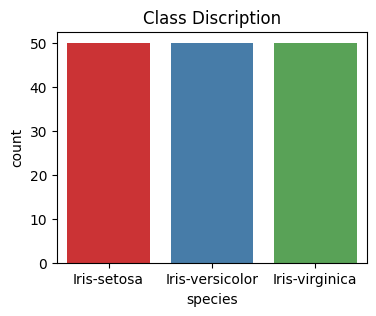

In [12]:
#countplot of different species
plt.figure(figsize=(4,3))
sns.countplot(x='species',data=dataset,palette='Set1')
plt.title("Class Discription")
plt.show()

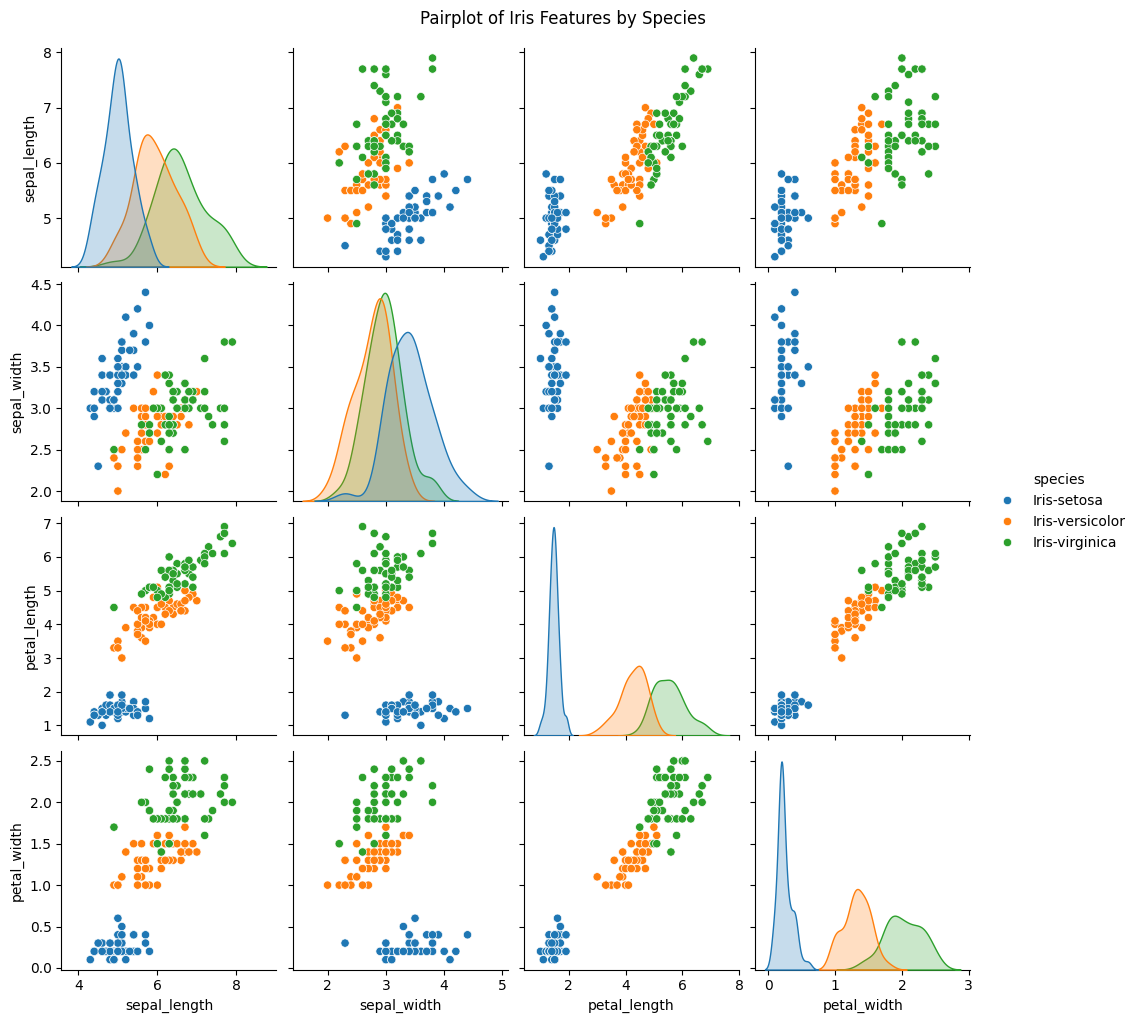

In [13]:
#pairplot for iris features of species
sns.pairplot(dataset, hue='species')
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()

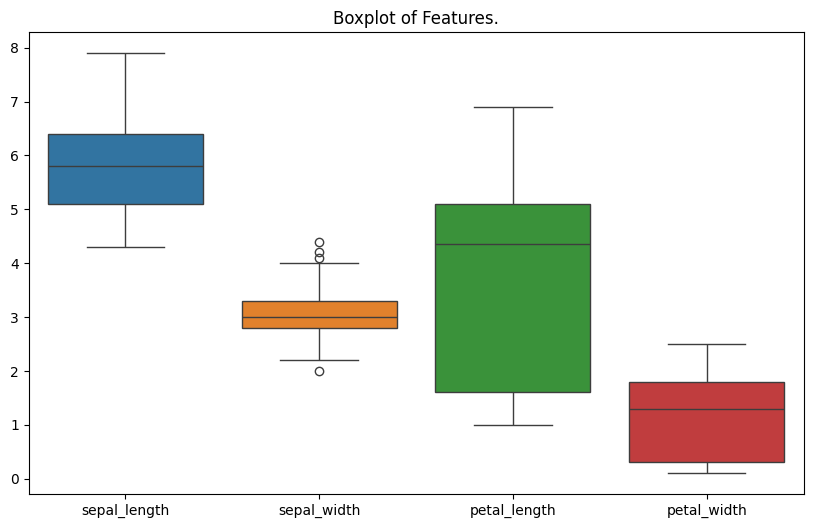

In [14]:
#boxplot for festures of species to find median,outliers, etc
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset.iloc[:,0:4])
plt.title("Boxplot of Features.")
plt.show()

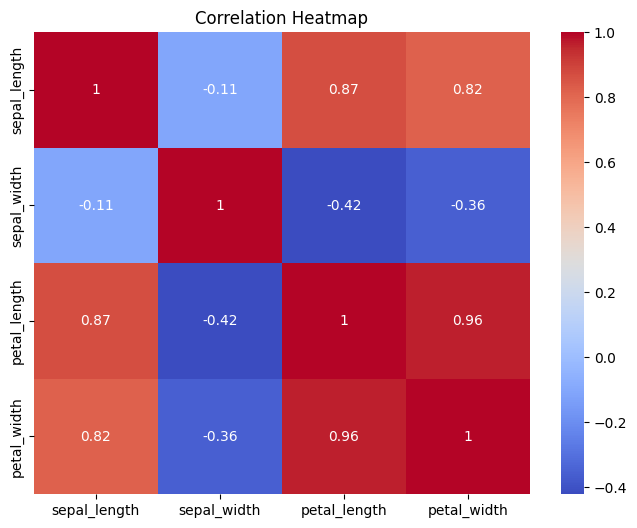

In [15]:
#heatmap to show correlation between features of species
plt.figure(figsize=(8,6))
sns.heatmap(dataset.iloc[:,0:4].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Data Preprocessing

Split Features and Target

In [16]:
x=dataset.iloc[:,0:4]
y=dataset['species']

In [17]:
#train test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model Building

In [18]:
#Logistic Regression
lr=LogisticRegression(max_iter=200)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [19]:
# K-Nearest Neighbours(KNN)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [20]:
# Decision Tree Classifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

In [21]:
# Support Vector machine(SVM)
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)

In [22]:
#Random Forest Classifer
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

Model Evaluation

In [23]:
#Logistic Regression Evaluation
accuracy_score(y_test,y_pred_lr)
print(classification_report(y_test,y_pred_lr))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [24]:
#KNN Evaluation
accuracy_score(y_test,y_pred_knn)
print(classification_report(y_test,y_pred_knn))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [25]:
#Decision Tree Evaluation 
accuracy_score(y_test,y_pred_dt)
print(classification_report(y_test,y_pred_dt))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [26]:
#SVM Evaluation
accuracy_score(y_test,y_pred_svm)
print(classification_report(y_test,y_pred_svm))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [27]:
#Random Forest Evaluation
accuracy_score(y_test,y_pred_rf)
print(classification_report(y_test,y_pred_rf))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Model Comaprision

In [28]:
models=['Logistic Regression','KNN','Decision Tree','SVM','Random Forest']
accuracy=[accuracy_score(y_test,y_pred_lr),accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_dt),accuracy_score(y_test,y_pred_svm),accuracy_score(y_test,y_pred_rf)]
comparision=pd.DataFrame({'Model': models, 'Accuracy': accuracy})
comparision

,Model,Accuracy
0,Logistic Regression,1.0
1,KNN,1.0
2,Decision Tree,1.0
3,SVM,1.0
4,Random Forest,1.0


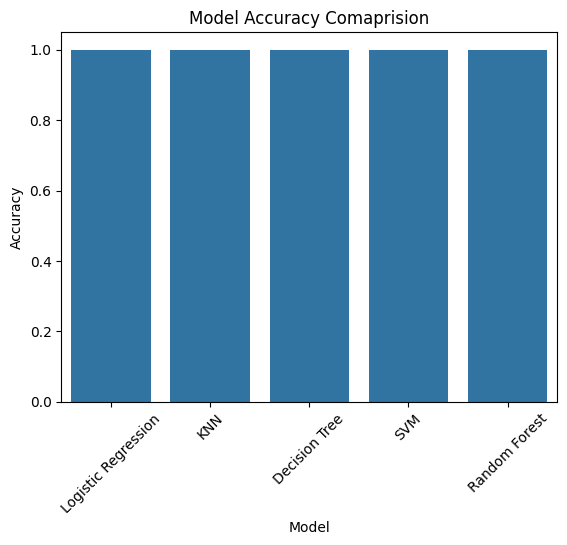

In [29]:
sns.barplot(x='Model',y='Accuracy', data=comparision)
plt.xticks(rotation=45)
plt.title('Model Accuracy Comaprision')
plt.show()

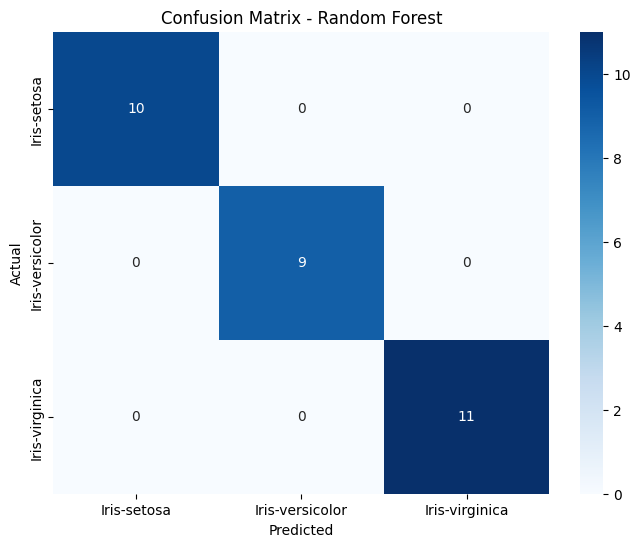

In [30]:
# Using the best model (typically Random Forest)
best_model = rf
y_pred_best = y_pred_rf

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Cross Validation

In [31]:
models={'LogisticRegression':LogisticRegression(max_iter=200),'KNN':KNeighborsClassifier(),'Decision Tree':DecisionTreeClassifier(),"SVM":SVC(),"Random Forest": RandomForestClassifier()}
for name,model in models.items():
    scores=cross_val_score(model,x,y,cv=5)
    print(f"{name}: Mean Accuracy = {scores.mean(): .4f}")

LogisticRegression: Mean Accuracy =  0.9733
KNN: Mean Accuracy =  0.9733
Decision Tree: Mean Accuracy =  0.9667
SVM: Mean Accuracy =  0.9667
Random Forest: Mean Accuracy =  0.9600


Making Predictions on New Data

In [32]:
def predict_iris(sepal_length, sepal_width, petal_length, petal_width,
                 model, target_names=None, scaler=None):

    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    if scaler is not None:
        input_data = scaler.transform(input_data)

    # Prediction
    pred_class = model.predict(input_data)[0]   # already a label

    # Probabilities
    if hasattr(model, "predict_proba"):
        pred_prob = model.predict_proba(input_data)[0]
        class_labels = model.classes_
        probabilities = {
            class_labels[i]: round(float(pred_prob[i]), 4)
            for i in range(len(class_labels))
        }
    else:
        probabilities = None

    return pred_class, probabilities


In [36]:
#Example 1 of prediction
example = [5.1, 3.5, 1.4, 0.2]

predicted_species, probabilities = predict_iris(
    *example,
    model=rf,
    target_names=np.unique(y_test)
)

print("Input:", example)
print("Predicted Species:", predicted_species)
print("Probabilities:", probabilities)


Input: [5.1, 3.5, 1.4, 0.2]
Predicted Species: Iris-setosa
Probabilities: {'Iris-setosa': 1.0, 'Iris-versicolor': 0.0, 'Iris-virginica': 0.0}


In [37]:
#Example 2 of prediction
example = [6.7, 3.1, 5.6, 2.4]

predicted_species, probabilities = predict_iris(
    *example,
    model=rf
)

print("Input:", example)
print("Predicted Species:", predicted_species)
print("Probabilities:", probabilities)

Input: [6.7, 3.1, 5.6, 2.4]
Predicted Species: Iris-virginica
Probabilities: {'Iris-setosa': 0.0, 'Iris-versicolor': 0.0, 'Iris-virginica': 1.0}


                                                                     Thank You!!                                                                                                  